In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *

In [3]:
PATH = Path('/content/data')

In [4]:
src = (ImageList.from_csv(PATH,'train.csv',folder='train',suffix='.jpg')
       .split_by_rand_pct(0.2,42)
       .label_from_df()
      )

In [5]:
tfms = get_transforms(flip_vert=True,xtra_tfms=[cutout()])

In [6]:
def getdata(sz,bs):
    return src.transform(tfms=tfms,size=sz).databunch(bs=bs).normalize(imagenet_stats)

In [7]:
sz = 224
bs = 16

In [8]:
data = getdata(sz,bs)

In [9]:
learn = cnn_learner(data,models.resnet152,metrics=accuracy,callback_fns=[CSVLogger])

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:02<00:00, 102455362.85it/s]


In [10]:
learn.model_dir = '/content/gdrive/My Drive/GardeNerd/resnet151_models'

In [11]:
learn.callbacks = [SaveModelCallback(learn,every='epoch',monitor='accuracy',name='model')]

In [12]:
print(data.classes)
len(data.classes),data.c

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102]


(102, 102)

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.612463,0.275245,0.930421,10:37
1,0.258414,0.095259,0.975189,10:27
2,0.117199,0.037295,0.990291,10:27
3,0.073341,0.023424,0.993528,10:29


In [13]:
learn.save('stage-1')

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.79E-06
Min loss divided by 10: 6.31E-06


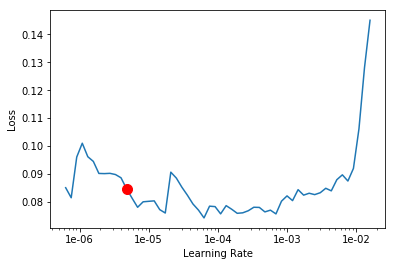

In [15]:
learn.recorder.plot(suggestion=True)

In [16]:
learn.unfreeze()

In [17]:
learn.fit_one_cycle(2,max_lr=slice(4e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.071675,0.023439,0.993528,13:42
1,0.064506,0.022881,0.992718,13:44


In [13]:
learn.load('stage-1');

In [14]:
learn.data  = getdata(400,bs)

In [54]:
learn.export(file='resnet151_export')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time


# Prediction with Resnet151

In [14]:
learn.data.add_test(ImageList.from_csv(PATH,'sample_submission.csv',folder='test',suffix='.jpg'))

In [15]:
preds_resnet151 = learn.TTA(ds_type=DatasetType.Test)

In [16]:
preds_resnet151

(tensor([[3.8791e-07, 6.6670e-07, 8.6022e-03,  ..., 8.7788e-07, 1.2319e-06,
          2.1644e-08],
         [6.1313e-06, 9.3798e-08, 9.2793e-07,  ..., 1.9616e-06, 8.5038e-07,
          1.9738e-09],
         [1.7213e-06, 7.1275e-06, 1.0696e-04,  ..., 7.5295e-06, 3.5283e-03,
          4.4398e-07],
         ...,
         [3.2463e-06, 1.4344e-05, 2.8119e-04,  ..., 1.2737e-03, 1.9116e-03,
          1.5063e-04],
         [5.9336e-07, 5.5638e-08, 1.3149e-07,  ..., 1.8625e-08, 5.9885e-09,
          4.1268e-10],
         [1.3801e-06, 1.9239e-07, 1.9149e-08,  ..., 1.4081e-07, 2.5163e-07,
          7.9151e-10]]), tensor([0, 0, 0,  ..., 0, 0, 0]))

# Get prediction with resnet18

In [48]:
resnet18_learner = load_learner(PATH)

In [49]:
resnet18_learner.data.add_test(ImageList.from_csv(PATH,'sample_submission.csv',folder='test',suffix='.jpg'))
preds_resnet18,_ = resnet18_learner.TTA(ds_type=DatasetType.Test)

In [50]:
preds_resnet18

tensor([[7.3398e-09, 4.2670e-09, 1.5360e-05,  ..., 2.9855e-08, 1.2399e-09,
         3.0829e-10],
        [1.6162e-07, 1.5761e-09, 7.7571e-09,  ..., 2.7722e-09, 1.8744e-08,
         9.9515e-11],
        [3.8549e-05, 1.2546e-04, 1.0462e-04,  ..., 1.4062e-04, 2.5332e-03,
         2.0571e-05],
        ...,
        [1.2990e-05, 2.4451e-05, 1.4617e-03,  ..., 7.5935e-04, 2.2779e-03,
         5.2415e-05],
        [8.3356e-11, 6.1995e-11, 1.0950e-09,  ..., 2.6283e-11, 4.7965e-09,
         4.9102e-12],
        [4.2480e-13, 2.3639e-16, 3.1347e-16,  ..., 4.2512e-16, 4.8387e-13,
         6.6632e-19]])

# Get prediction with Resnet34

In [22]:
resnet34_learner = cnn_learner(data,models.resnet34,metrics=accuracy,pretrained=False)

In [23]:
resnet34_learner.model_dir = '/content/gdrive/My Drive/GardeNerd/models'

In [39]:
resnet34_learner.load('resnet34_stage-4');

In [25]:
resnet34_learner.data.add_test(ImageList.from_csv(PATH,'sample_submission.csv',folder='test',suffix='.jpg'))
preds_resnet34,_ = resnet34_learner.TTA(ds_type=DatasetType.Test)

In [31]:
preds_resnet18 + preds_resnet34 + preds_resnet151[0]

tensor([[6.8209e-07, 7.5620e-07, 8.8877e-03,  ..., 1.0592e-06, 3.3596e-06,
         2.9546e-08],
        [1.0529e-03, 2.2889e-06, 7.2746e-06,  ..., 2.3359e-06, 4.9741e-06,
         2.7679e-06],
        [2.5640e-05, 9.7601e-04, 1.8244e-03,  ..., 1.9397e-04, 9.3867e-03,
         1.5527e-03],
        ...,
        [9.7105e-05, 2.3446e-05, 8.6031e-03,  ..., 1.3090e-03, 1.9802e-03,
         2.0417e-04],
        [6.2405e-07, 5.8669e-08, 1.7007e-07,  ..., 3.0032e-08, 2.1311e-08,
         5.8407e-10],
        [5.4577e-06, 1.9245e-07, 1.9500e-08,  ..., 1.4084e-07, 2.5503e-07,
         7.9219e-10]])

In [30]:
preds_resnet151[0]

tensor([[3.8791e-07, 6.6670e-07, 8.6022e-03,  ..., 8.7788e-07, 1.2319e-06,
         2.1644e-08],
        [6.1313e-06, 9.3798e-08, 9.2793e-07,  ..., 1.9616e-06, 8.5038e-07,
         1.9738e-09],
        [1.7213e-06, 7.1275e-06, 1.0696e-04,  ..., 7.5295e-06, 3.5283e-03,
         4.4398e-07],
        ...,
        [3.2463e-06, 1.4344e-05, 2.8119e-04,  ..., 1.2737e-03, 1.9116e-03,
         1.5063e-04],
        [5.9336e-07, 5.5638e-08, 1.3149e-07,  ..., 1.8625e-08, 5.9885e-09,
         4.1268e-10],
        [1.3801e-06, 1.9239e-07, 1.9149e-08,  ..., 1.4081e-07, 2.5163e-07,
         7.9151e-10]])

# Submission

In [32]:
final_preds = (preds_resnet18 + preds_resnet34 + preds_resnet151[0])/3

In [33]:
final_preds

tensor([[2.2736e-07, 2.5207e-07, 2.9626e-03,  ..., 3.5308e-07, 1.1199e-06,
         9.8486e-09],
        [3.5097e-04, 7.6296e-07, 2.4249e-06,  ..., 7.7862e-07, 1.6580e-06,
         9.2265e-07],
        [8.5468e-06, 3.2534e-04, 6.0813e-04,  ..., 6.4656e-05, 3.1289e-03,
         5.1758e-04],
        ...,
        [3.2368e-05, 7.8153e-06, 2.8677e-03,  ..., 4.3633e-04, 6.6007e-04,
         6.8055e-05],
        [2.0802e-07, 1.9556e-08, 5.6691e-08,  ..., 1.0011e-08, 7.1038e-09,
         1.9469e-10],
        [1.8192e-06, 6.4151e-08, 6.5000e-09,  ..., 4.6946e-08, 8.5010e-08,
         2.6406e-10]])

In [34]:
final_preds.argmax(1)

tensor([ 8, 39, 39,  ..., 39, 71, 50])

In [51]:
sample_df = pd.read_csv(PATH/'sample_submission.csv')
learn.data.add_test(ImageList.from_csv(PATH,'sample_submission.csv',folder='test',suffix='.jpg'))

#preds,y = learn.TTA(ds_type=DatasetType.Test)
sample_df.category = preds_resnet18.argmax(1) + 1
#sample_df.category = final_preds.argmax(1) + 1
sample_df.to_csv('submission.csv',index=False)

In [52]:
sample_df.head()

,image_id,category
0,18540,9
1,18541,40
2,18542,40
3,18543,72
4,18544,51


In [46]:
sample_df.head()

,image_id,category
0,18540,9
1,18541,40
2,18542,40
3,18543,72
4,18544,51
